# Comparing Woodward-Fieser and Woodward Fieser Extended

In [2]:
import sys, os
import numpy as np
import pandas as pd
from rdkit import Chem

sys.path.append('../src/')
import chromopredict as cp

## Literature Database

Data from Table 3 and Supporting Information of: https://onlinelibrary.wiley.com/doi/10.1002/qua.20982

In [38]:
df_lit = pd.read_csv('data_10p1002_qua20982.csv')
df_lit.head(n=5)

,smiles,solvent,nm_exp,nm_pbe0,nm_wf_lit
0,CC(=O)C1=C(C)CCCC1,CCO,247.0,248.8,249
1,CC(C)=C1CCC(C)CC1=O,CCO,252.0,253.4,254
2,CC1=CC(=O)CC(C)(C)C1,CCO,235.0,229.0,239
3,CC1=C2CCCCC2CCC1=O,CCCCCCC,239.0,239.0,243
4,CC=CC=CC=O,CCCCCC,261.0,265.2,252


In [39]:
def get_wf_outputs(smiles, solvent=None, extended=False):
    pred, img = cp.predict(smiles, solvent, draw=False, extended=extended)
    return pd.Series([pred, img], index=['nm_wf', 'img_wf'])
    
nm_wf = []
img_wf = []

nm_wfe = []
img_wfe = []

for _, row in df_lit.iterrows():
    smi = row['smiles']
    solv = row['solvent']
    nm, img = get_wf_outputs(smi, solv, extended=False)
    nm_wf.append(nm)
    img_wf.append(img)
    nm, img = get_wf_outputs(smi, solv, extended=True)
    nm_wfe.append(nm)
    img_wfe.append(img)


In [40]:
df_lit['nm_wf'] = nm_wf
df_lit['nm_wfe'] = nm_wfe

df_lit['img_wf'] = img_wf
df_lit['img_wfe'] = img_wfe

In [41]:
df_lit.head(n=5)

,smiles,solvent,nm_exp,nm_pbe0,nm_wf_lit,nm_wf,nm_wfe,img_wf,img_wfe
0,CC(=O)C1=C(C)CCCC1,CCO,247.0,248.8,249,236,246,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,CC(C)=C1CCC(C)CC1=O,CCO,252.0,253.4,254,241,251,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,CC1=CC(=O)CC(C)(C)C1,CCO,235.0,229.0,239,226,235,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,CC1=C2CCCCC2CCC1=O,CCCCCCC,239.0,239.0,243,242,252,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,CC=CC=CC=O,CCCCCC,261.0,265.2,252,269,235,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...


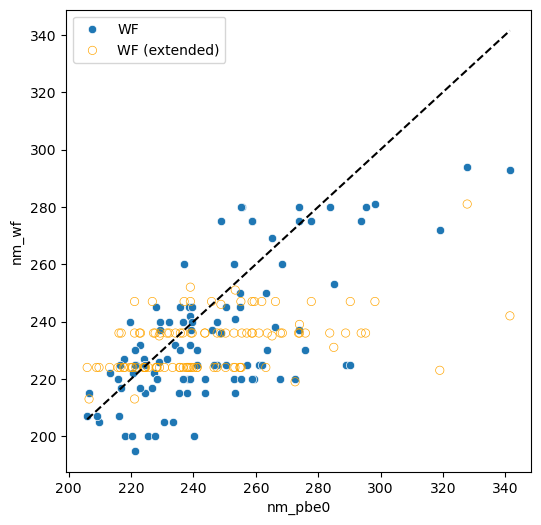

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

sns.scatterplot(
    data=df_lit,
    x='nm_pbe0',
    y='nm_wf',
    marker='o',
    #color='blue',
    label='WF'
)

# Plot hollow circles for 'nm_wfe'
sns.scatterplot(
    data=df_lit,
    x='nm_pbe0',
    y='nm_wfe',
    marker='o',
    facecolors='none',  # hollow
    edgecolor='orange',
    label='WF (extended)'
)

# Add identity line for reference
plt.plot([df_lit['nm_pbe0'].min(), df_lit['nm_pbe0'].max()],
         [df_lit['nm_pbe0'].min(), df_lit['nm_pbe0'].max()],
         'k--', label='y = x')



In [43]:
# Difference between nm_wfe and nm_wf
df_lit['delta_wfe_wf'] = df_lit['nm_wfe'] - df_lit['nm_wf']
df_lit['delta_lit_wf'] = df_lit['nm_wfe'] - df_lit['nm_wf']
df_lit['delta_lit_wfe'] = df_lit['nm_wfe'] - df_lit['nm_wf']

# Difference between nm_wf and nm_pbe0
df_lit['delta_wf_pbe0'] = df_lit['nm_wf'] - df_lit['nm_pbe0']

# Difference between nm_wfe and nm_pbe0
df_lit['delta_wfe_pbe0'] = df_lit['nm_wfe'] - df_lit['nm_pbe0']


In [44]:
import numpy as np
# Create the 'method' column based on your logic
df_lit['method'] = np.where(
    df_lit['delta_wfe_wf'].abs() > 5,
    np.where(df_lit['delta_wf_pbe0'].abs() < df_lit['delta_wfe_pbe0'].abs(), 'WF', 'WF (extended)'),
    'WF'
)


In [46]:
df_lit['nm_wf_lit'] = pd.to_numeric(df_lit['nm_wf_lit'], errors='coerce')
df_lit.head(n=13)

,smiles,solvent,nm_exp,nm_pbe0,nm_wf_lit,nm_wf,nm_wfe,img_wf,img_wfe,delta_wfe_wf,delta_lit_wf,delta_lit_wfe,delta_wf_pbe0,delta_wfe_pbe0,method
0,CC(=O)C1=C(C)CCCC1,CCO,247.0,248.8,249.0,236,246,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,10,10,10,-12.8,-2.8,WF (extended)
1,CC(C)=C1CCC(C)CC1=O,CCO,252.0,253.4,254.0,241,251,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,10,10,10,-12.4,-2.4,WF (extended)
2,CC1=CC(=O)CC(C)(C)C1,CCO,235.0,229.0,239.0,226,235,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,9,9,9,-3.0,6.0,WF
3,CC1=C2CCCCC2CCC1=O,CCCCCCC,239.0,239.0,243.0,242,252,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,10,10,10,3.0,13.0,WF
4,CC=CC=CC=O,CCCCCC,261.0,265.2,252.0,269,235,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,-34,-34,-34,3.8,-30.2,WF
5,CC(=O)C=CC1=C(C)CCCC1(C)C,CCCCCCC,283.0,298.2,288.0,281,247,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,-34,-34,-34,-17.2,-51.2,WF
6,CC=CC=CC=CC(=O)O,CCO,297.0,319.0,293.0,272,223,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,-49,-49,-49,-47.0,-96.0,WF
7,CC(C)=CC(=O)C=C(C)C,CCCCCC,260.0,266.3,NaN,238,247,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,9,9,9,-28.3,-19.3,WF (extended)
8,O=CC(Cl)=C(Cl)C(=O)O,O,263.0,274.0,NaN,237,239,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,2,2,2,-37.0,-35.0,WF
9,COC(=O)C1=C(C)C(C)=C(C(=O)OC)CC1,CCCCCC,300.0,327.8,NaN,294,281,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...,-13,-13,-13,-33.8,-46.8,WF


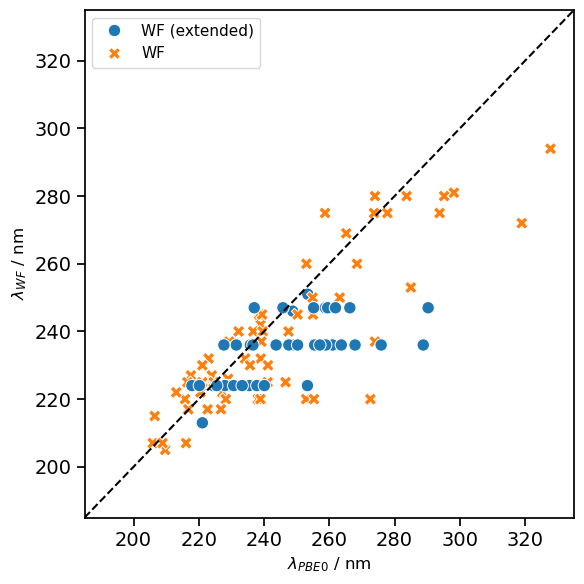

In [47]:
# create a column for the best predictions
df_lit['nm_wf_best'] = np.where(df_lit['method'] == 'WF', df_lit['nm_wf'], df_lit['nm_wfe'])

sns.set_context("notebook", rc={"xtick.labelsize":14, "ytick.labelsize":14})

# Step 2: Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_lit, x='nm_pbe0', y='nm_wf_best', s=80, hue='method', style='method')
#sns.scatterplot(data=df_lit, x='nm_pbe0', y='nm_wf_lit', s=60, marker='o',
#    facecolors='none',  # hollow
#    edgecolor='red', label='Reference')

min_val = 185
max_val = 335
# Add identity line for reference
plt.plot([min_val,max_val], [min_val, max_val], 'k--')
#plt.plot([df_lit['nm_pbe0'].min(), df_lit['nm_pbe0'].max()], [df_lit['nm_pbe0'].min(), df_lit['nm_pbe0'].max()], 'k--')

# Labels and legend
plt.xlabel('$\lambda_{PBE0}$ / nm')
plt.ylabel('$\lambda_{WF}$ / nm')
#plt.title('WF Predicted vs. TDDFT Reference Absorption Wavelengths')

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.legend()
plt.tight_layout()
plt.show()


In [48]:
df_best_wfe = df_lit[df_lit['method'] == 'WF (extended)'][['smiles', 'img_wfe']]
df_best_wfe.count()

smiles     41
img_wfe    41
dtype: int64

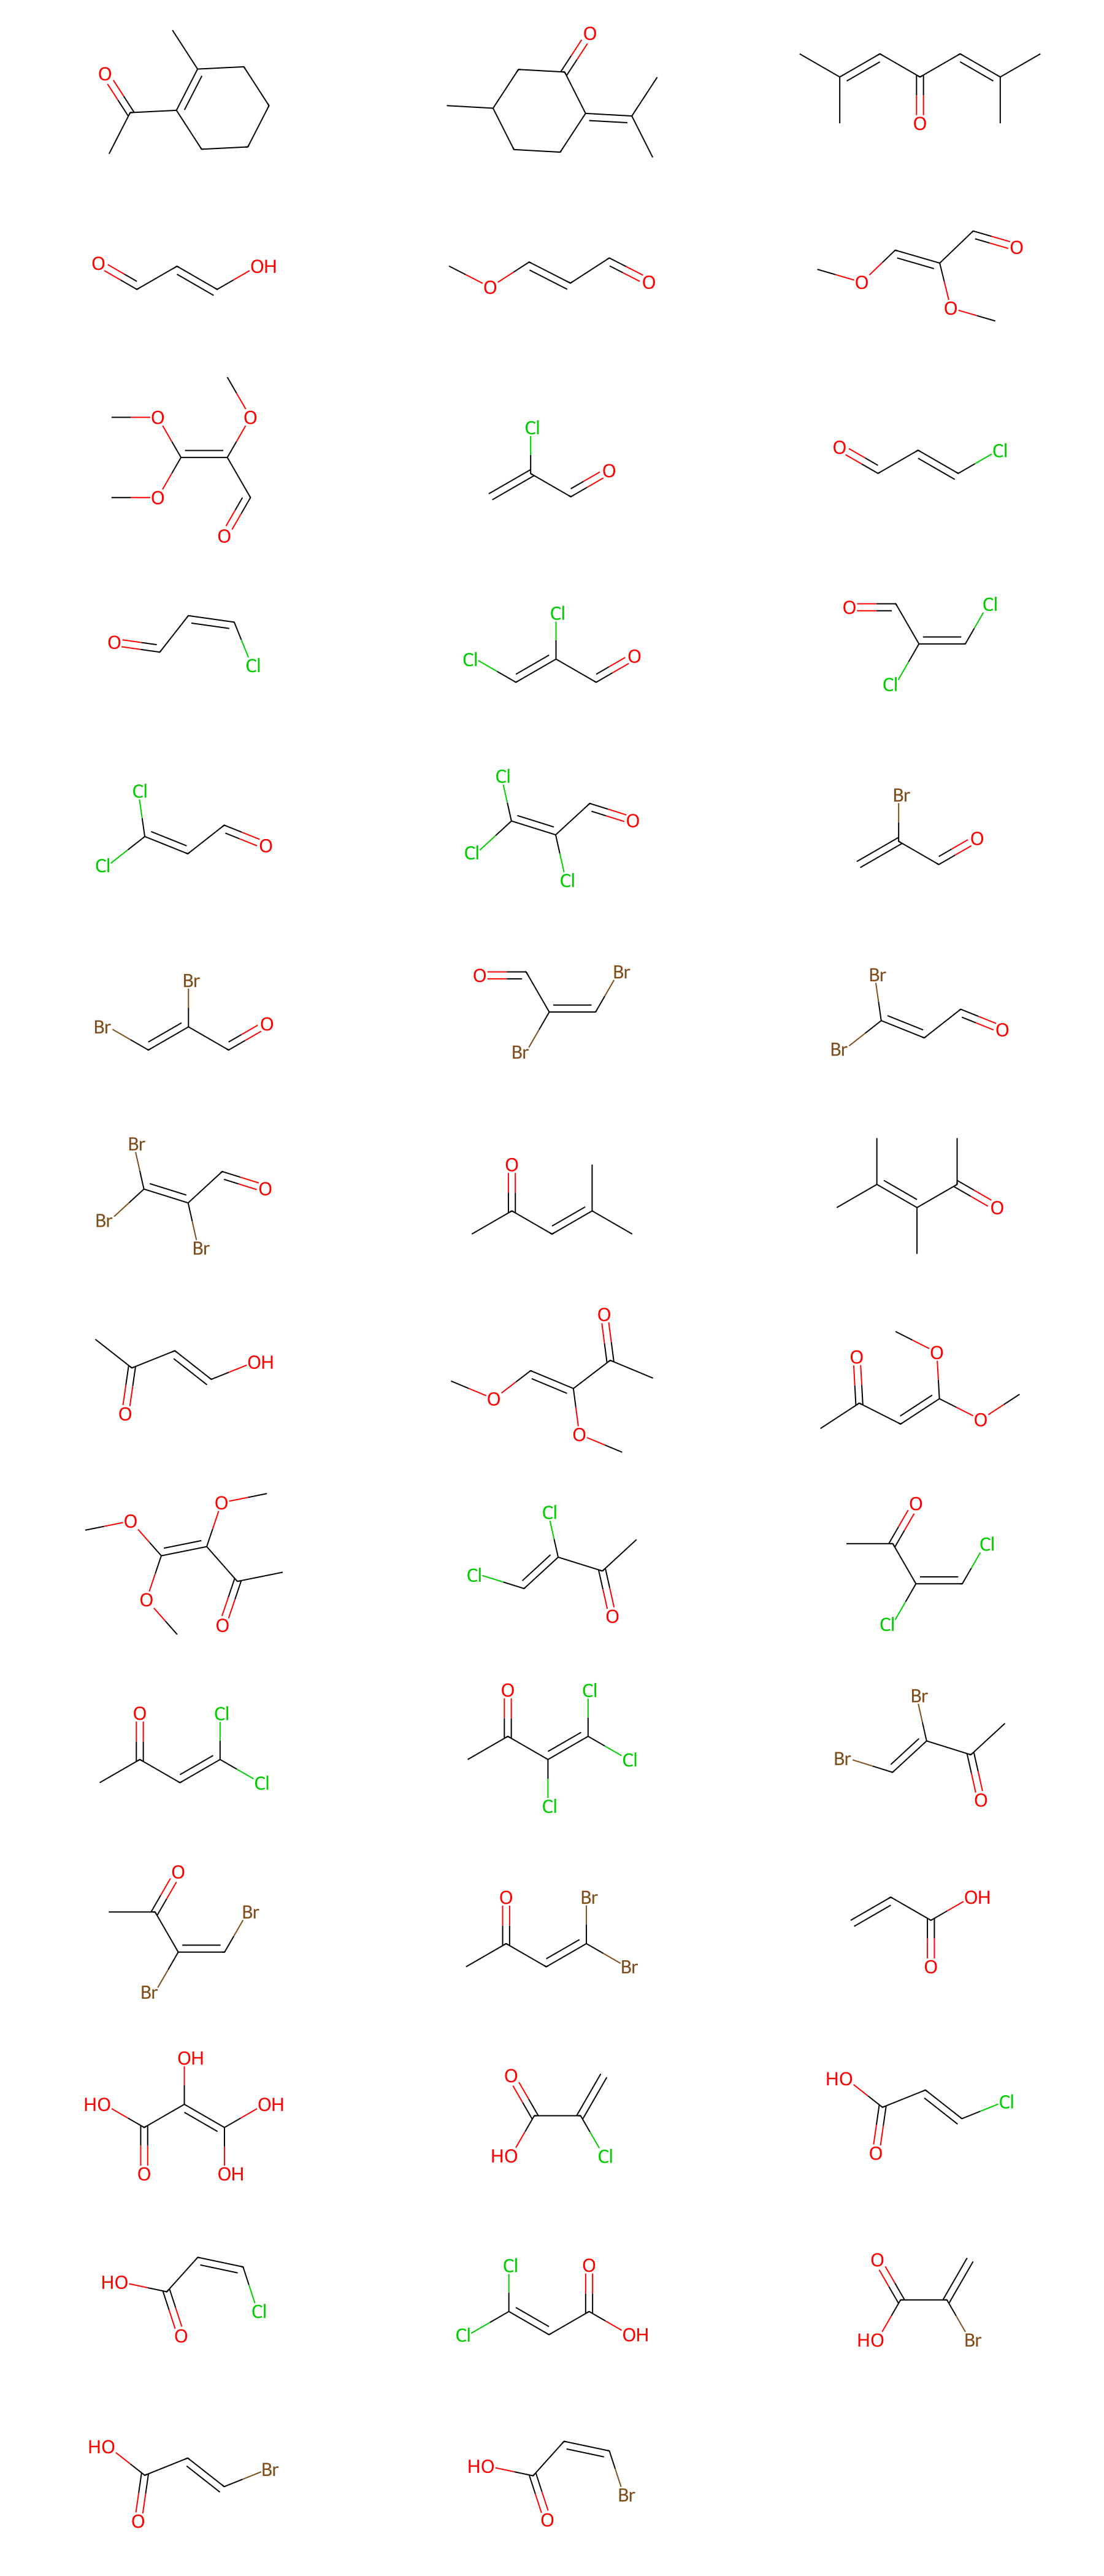

In [49]:
from rdkit.Chem.Draw import MolsToGridImage
from IPython.display import display

def plot_mols(df):

    df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
    
    img = MolsToGridImage(
        df['mol'].tolist()[:100],
        molsPerRow=3,
        subImgSize=(600, 300),
        maxMols=200
        )

    display(img)

plot_mols(df_best_wfe)